<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Naiya Dwita Ayunir"
KELAS = "C"
NPM = "2106651976"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Naiya Dwita Ayunir dari kelas C dengan NPM 2106651976, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Naiya Dwita Ayunir)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [ ]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [ ]:
# TODO: Open your dataset
ecoli = pd.read_csv('ecoli.csv')
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [ ]:
# Melihat missing value

def cek_missing_values(ecoli):
    col_na = ecoli.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(ecoli)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

cek_missing_values(ecoli)

,Total,Percent


In [ ]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', ecoli.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [ ]:
# Melihat outlier
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = dict(check_outlier(ecoli).sum())

Outlier pada tiap atribut:
mcg       0
gvh      13
lip      10
chg       1
aac       9
alm1      0
alm2      0
class     0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit(ecoli)

standardized_ecoli = standard_scaler.transform(ecoli)

standardized_ecoli_df = pd.DataFrame(standardized_ecoli, index=ecoli.index, columns=ecoli.columns)

print(standardized_ecoli_df.head())


        mcg       gvh       lip       chg       aac      alm1      alm2  \
0 -0.051761 -1.419531 -0.175142 -0.054636  0.490781 -1.207717 -0.716084   
1 -2.212876 -0.675967 -0.175142 -0.054636  0.327106 -0.697111 -0.285665   
2  0.308424 -0.675967 -0.175142 -0.054636 -0.082081 -0.604273 -0.190016   
3  0.462790 -0.067597 -0.175142 -0.054636  0.163431 -0.232923 -0.668259   
4 -1.389594 -1.216741 -0.175142 -0.054636  0.408944 -1.161299 -0.716084   

      class  
0 -0.812457  
1 -0.812457  
2 -0.812457  
3 -0.812457  
4 -0.812457  


In [ ]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = standardized_ecoli_df[['mcg', 'gvh', 'lip', 'aac', 'alm1', 'alm2']]

## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.32867992659587697
For n_clusters = 3 The average silhouette_coefficient is : 0.3847648024013823
For n_clusters = 4 The average silhouette_coefficient is : 0.40722177796052494
For n_clusters = 5 The average silhouette_coefficient is : 0.4056940690885863
For n_clusters = 6 The average silhouette_coefficient is : 0.35945393249049384
For n_clusters = 7 The average silhouette_coefficient is : 0.2626225955480648
For n_clusters = 8 The average silhouette_coefficient is : 0.2605608497760121
For n_clusters = 9 The average silhouette_coefficient is : 0.2488170542850826
For n_clusters = 10 The average silhouette_coefficient is : 0.2418130340262563
For n_clusters = 11 The average silhouette_coefficient is : 0.23002509880482128
For n_clusters = 12 The average silhouette_coefficient is : 0.23793641765349166
For n_clusters = 13 The average silhouette_coefficient is : 0.22204568404810038


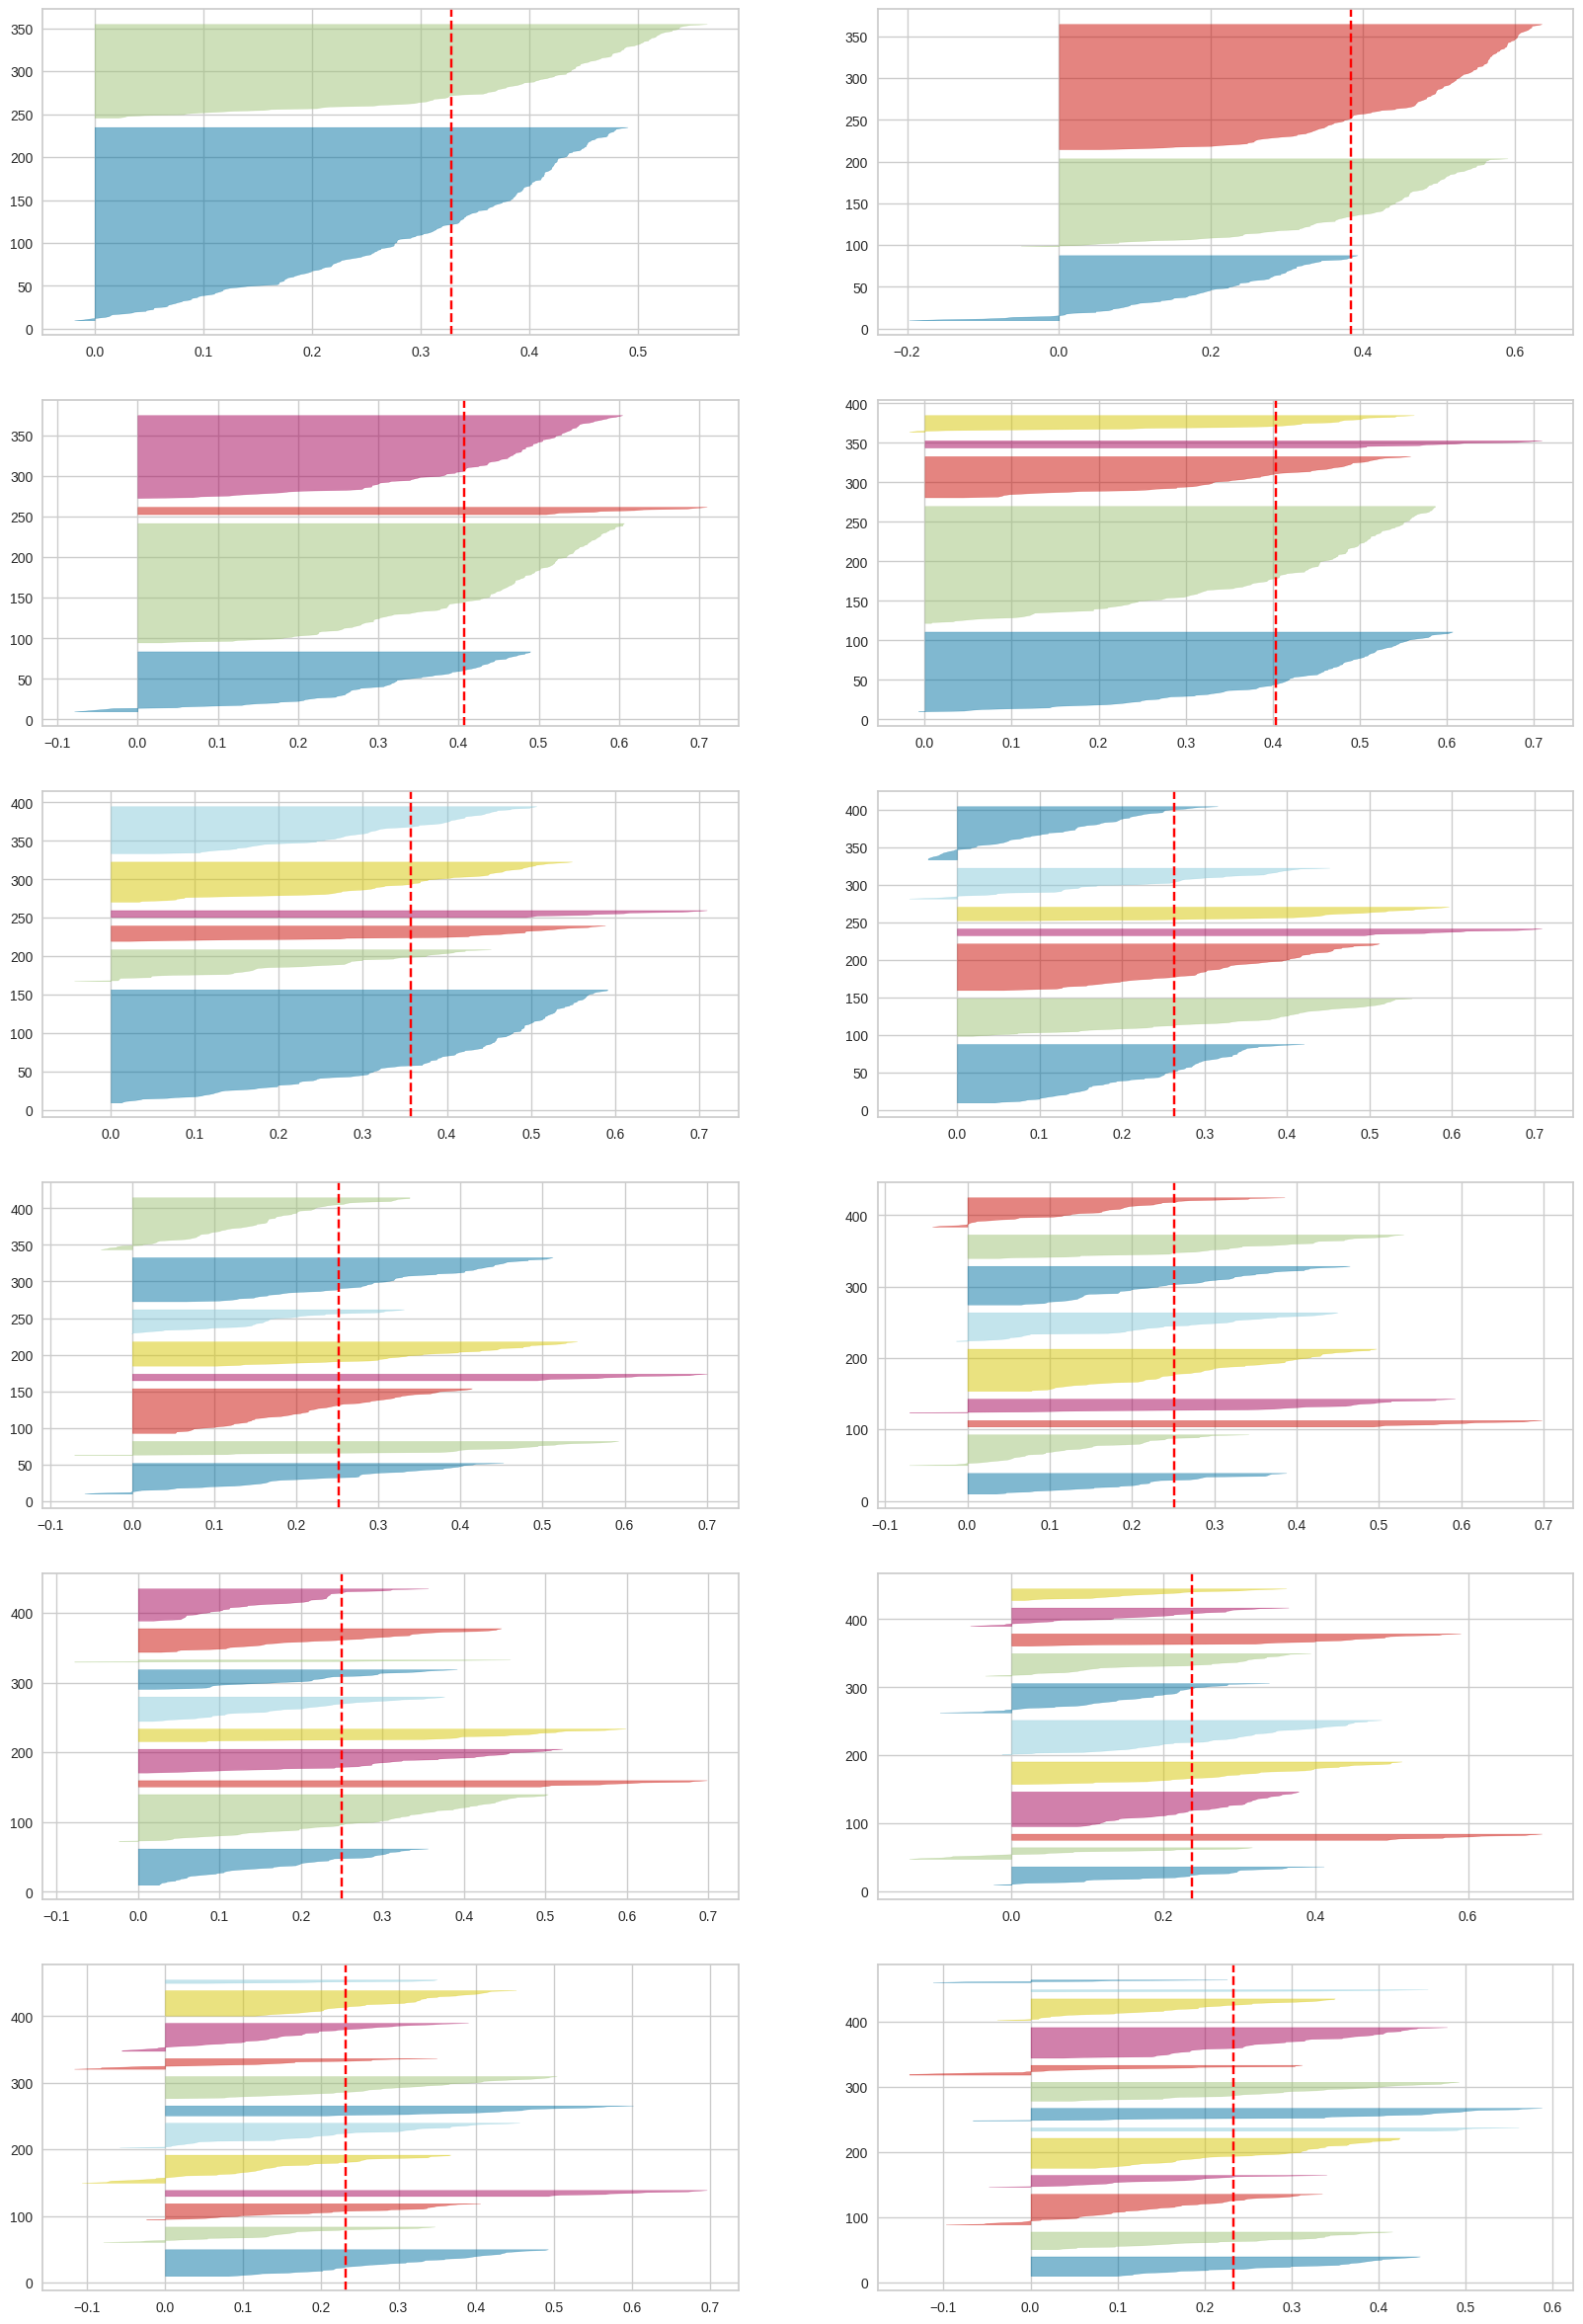

In [ ]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

fig, ax = plt.subplots(6, 2, figsize=(20,30))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k-2, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [ ]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=3)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('gvh', 'alm1'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gvh,alm1,Clusters
0,-1.419531,-1.207717,1
1,-0.675967,-0.697111,1
2,-0.675967,-0.604273,1
3,-0.067597,-0.232923,2
4,-1.216741,-1.161299,1
...,...,...,...
331,0.405580,0.834709,2
332,0.473177,-0.697111,2
333,0.675967,-0.511436,2
334,0.743564,-0.372179,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


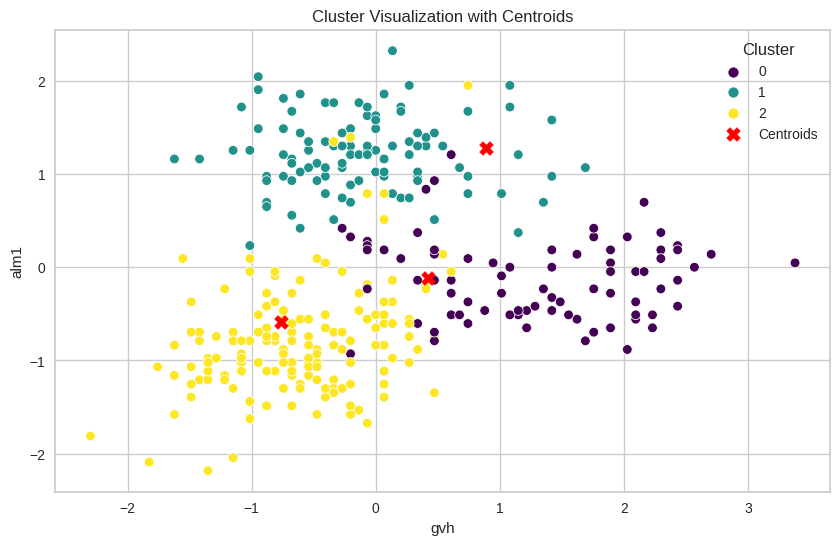

In [ ]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3)
cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('gvh', 'alm1'))
data_with_clusters['Clusters'] = cluster_assignment

centroids = kmeans.cluster_centers_


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_clusters, x='gvh', y='alm1', hue='Clusters', palette='viridis')


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')


plt.title('Cluster Visualization with Centroids')
plt.xlabel('gvh')
plt.ylabel('alm1')
plt.legend(title='Cluster')
plt.show()


## Hierarchical Clustering [35]

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [ ]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([258, 191, 294, 275, 283, 309, 305, 295, 203, 328, 206, 270, 327,
       277, 325, 312, 313, 246, 326, 253, 287, 311, 196, 239, 256, 263,
       315, 290, 335, 155, 317, 324, 228, 314, 259, 307, 319, 195, 252,
       303, 333, 174, 284, 308, 233, 220, 192, 200, 235, 310, 250, 211,
       254, 269, 197, 141, 261, 265, 264, 217, 316, 251, 267, 186, 188,
        97, 218, 187, 318, 183, 229, 156, 332, 247, 330, 238, 276, 302,
       304, 299, 222, 172, 281, 207, 266, 168, 224, 260, 153, 237, 331,
       151, 193, 223, 285, 268, 334, 214, 323, 219, 170, 249, 189, 108,
       282, 179, 236, 163, 300, 208, 225, 230,  95, 286, 209, 194, 142,
       320, 242, 297, 133, 149, 154, 221, 198, 293, 244, 159, 166, 278,
       157, 240, 212, 204, 178, 306, 234, 119, 232,  98, 171, 132, 280,
       255, 158, 129, 216, 321, 329, 201, 105, 288, 215, 248, 262, 243,
       107,  70, 322, 231, 165, 279,  53, 130, 177, 140, 162, 202, 184,
        96, 152, 138, 291, 180, 176,  91, 173, 245, 137, 182, 13

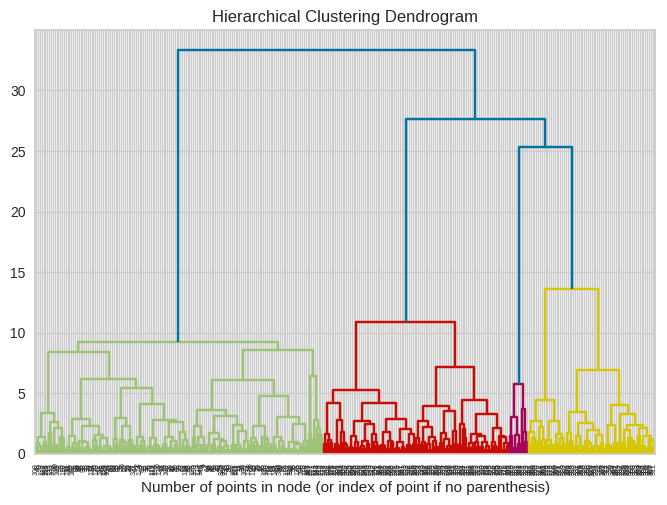

In [ ]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()


In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,gvh,alm1,Clusters,Agg_clusters
0,-1.419531,-1.207717,2,1
1,-0.675967,-0.697111,2,1
2,-0.675967,-0.604273,2,1
3,-0.067597,-0.232923,0,1
4,-1.216741,-1.161299,2,1
...,...,...,...,...
331,0.405580,0.834709,0,0
332,0.473177,-0.697111,0,0
333,0.675967,-0.511436,0,0
334,0.743564,-0.372179,0,0


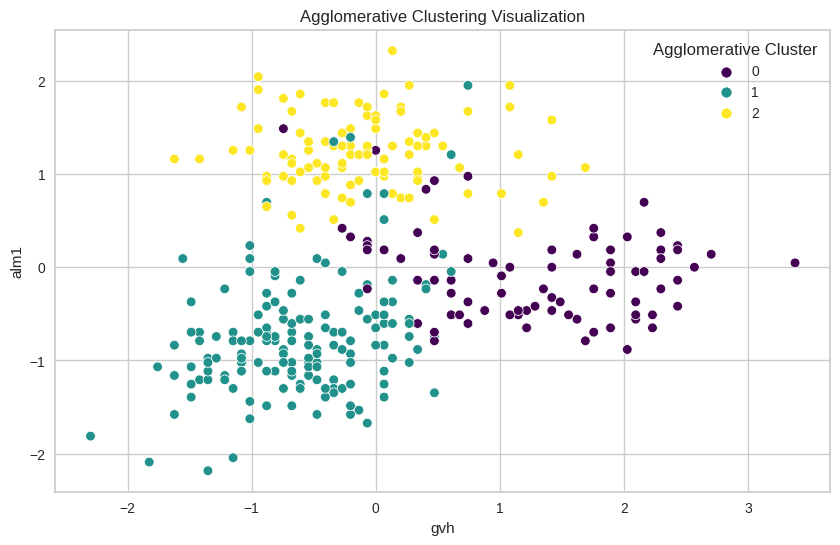

In [ ]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'gvh' and 'alm1' are the columns you want to use for x and y axes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_clusters, x='gvh', y='alm1', hue='Agg_clusters', palette='viridis')

# Adding title and labels
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('gvh')
plt.ylabel('alm1')
plt.legend(title='Agglomerative Cluster')
plt.show()


# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

_Note: Untuk menjawab pertanyaan diatas, Anda dapat menambahkan beberapa text cell sesuai kebutuhan_

**Dari hasil clustering yang telah dihasilkan menggunakan KMeans, berikan interpretasi mengenai cluster-cluster yang terbentuk!**

Data telah dibagi menjadi tiga klaster yang diidentifikasi dengan tiga warna berbeda dan centroid untuk setiap klaster ditunjukkan dengan tanda silang merah.

1. **Klaster Ungu (Klaster 0)**:
   Titik-titik dalam klaster ungu terkonsentrasi di area kiri bawah plot. Klaster ini menunjukkan homogenitas yang tinggi dengan titik-titik yang berdekatan satu sama lain, mengindikasikan keseragaman tinggi di dalam klaster tersebut.
   - **Centroid**: Berada di tengah klaster, menandakan posisi yang baik yang mewakili anggota klaster.

2. **Klaster Hijau (Klaster 1)**:
   Titik-titik dalam klaster hijau tersebar di sebelah kanan atas plot. Meskipun titik-titik ini lebih tersebar daripada klaster ungu, mereka masih menunjukkan adanya pengelompokan yang signifikan.
   - **Centroid**: Lokasinya yang terpusat menunjukkan bahwa ia berperan efektif sebagai titik rata-rata dari titik-titik dalam klaster ini.

3. **Klaster Kuning (Klaster 2)**:
   Klaster kuning tampaknya memiliki variasi yang lebih luas dalam hal distribusi titik-titiknya. Titik-titik ini terletak di antara dua klaster lainnya dan tampaknya mengisi ruang antara klaster ungu dan hijau.
   - **Centroid**: Centroidnya yang terletak lebih dekat ke klaster ungu mungkin menunjukkan bahwa beberapa titik dalam klaster kuning lebih mirip dengan klaster ungu atau bahwa ada overlap antara klaster kuning dan ungu.

**Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya, jelaskan 4 algoritma beserta cara kerjanya secara singkat dalam melakukan proses _clustering_!**

* **Spectral Clustering**:
  Spectral Clustering menggunakan representasi grafik dari data. Algoritma ini menghitung matriks afinitas antara sampel data dan kemudian menggunakan teknik-teknik dari analisis spektral (seperti eigen decomposition) untuk mengurangi dimensi. Setelah itu, clustering dilakukan pada ruang yang memiliki dimensi lebih rendah, seringkali menggunakan K-means.

* **Mean Shift Clustering**:
   Mean Shift berfokus pada pencarian centroid. Algoritma ini dimulai dengan centroid kandidat dan kemudian menggesernya secara iteratif ke rata-rata titik di sekitarnya, sehingga bergerak ke arah kepadatan tertinggi data. Proses ini diulangi hingga centroid stabil, yang menandakan adanya cluster.

* **Gaussian Mixture Models (GMM)**:
   GMM adalah pendekatan probabilistik untuk clustering. Algoritma ini mengasumsikan bahwa data berasal dari campuran beberapa distribusi Gaussian. Setiap cluster diasumsikan mengikuti distribusi Gaussian, dan selama proses clustering, algoritma ini mencoba mengestimasi parameter dari distribusi Gaussian ini serta probabilitas bahwa sebuah titik data termasuk dalam distribusi tertentu.

* **Affinity Propagation**:
   Affinity Propagation membuat cluster dengan mengirimkan pesan antara pasangan titik data. Tidak seperti algoritma lain yang membutuhkan jumlah cluster yang ditentukan sebelumnya, Affinity Propagation memilih jumlah cluster secara otomatis berdasarkan data. Algoritma ini mengidentifikasi 'exemplars', yaitu titik-titik yang dianggap sebagai pusat cluster berdasarkan bagaimana pesan dikirim antar titik.

**Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari clustering serta jelaskan masing-masing dari metrik tersebut! [6]**

1. **Silhouette Score**:
   Silhouette Score mengukur seberapa baik objek terkluster. Nilainya berkisar antara -1 hingga 1. Skor mendekati 1 menandakan bahwa objek berada jauh dari cluster lain (separasi yang baik), sedangkan skor mendekati -1 menandakan bahwa objek berada dekat dengan cluster lain (separasi yang buruk). Skor mendekati 0 menandakan bahwa objek berada di atau sangat dekat dengan batas keputusan antar cluster. Silhouette Score menggabungkan pengukuran kohesi (seberapa dekat objek dalam cluster yang sama) dan separasi (seberapa jauh objek dari cluster lain).

2. **Davies-Bouldin Index**:
   Davies-Bouldin Index adalah metrik yang mengukur rata-rata 'kesamaan' antara setiap cluster dengan cluster yang paling mirip. Kesamaan diukur sebagai rasio jarak dalam-cluster dan antar-cluster. Nilai yang lebih rendah menandakan pembagian cluster yang lebih baik, dengan nilai terendahnya adalah 0. Metrik ini efektif ketika digunakan pada dataset dengan cluster yang memiliki ukuran yang sebanding dan densitas yang mirip.

3. **Calinski-Harabasz Index (Variance Ratio Criterion)**:
   Calinski-Harabasz Index adalah rasio antara dispersi antar-cluster dan dispersi dalam-cluster. Nilai yang lebih tinggi menunjukkan bahwa cluster terpisah dengan baik. Metrik ini mengukur jumlah dispersi antar-cluster dibagi dengan jumlah dispersi dalam-cluster. Hal ini menguntungkan ketika cluster yang dihasilkan memiliki kerapatan yang serupa, tetapi tidak selalu efektif untuk data dengan struktur cluster yang beragam atau memiliki banyak noise.


**Jelaskan cara menghitung intra-cluster similarity dan inter-cluster dissimilarity! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]**
#### Intra-Cluster Similarity :
Intra-cluster similarity mengukur seberapa mirip titik-titik data dalam satu klaster. Biasanya diukur menggunakan jarak antara titik data dalam satu klaster dan centroid klaster (atau titik pusat lainnya). Metode umum termasuk rata-rata jarak Euclidean antara titik-titik dalam klaster ke centroidnya. Klaster dianggap baik jika memiliki intra-cluster similarity yang tinggi, artinya titik-titik dalam klaster tersebut sangat mirip atau dekat satu sama lain. Ini menunjukkan bahwa klaster tersebut homogen.

#### Inter-Cluster Dissimilarity:
Inter-cluster dissimilarity mengukur seberapa berbeda atau jauh klaster satu sama lain. Bisa diukur dengan berbagai cara, seperti jarak antara centroid klaster, atau jarak minimum antara titik-titik di klaster yang berbeda.

#### Yang Membuat Suatu Klaster Dianggap Baik:

1. **Intra-Cluster Similarity Tinggi**: Klaster dianggap baik jika memiliki intra-cluster similarity yang tinggi, artinya titik-titik dalam klaster tersebut sangat mirip atau dekat satu sama lain. Ini menunjukkan bahwa klaster tersebut homogen.

2. **Inter-Cluster Dissimilarity Tinggi**: Klaster juga dianggap baik jika memiliki inter-cluster dissimilarity yang tinggi. Ini berarti klaster-klaster tersebut jauh satu sama lain, menandakan bahwa mereka memisahkan berbagai kelompok data dengan jelas.

3. **Keseimbangan Antara Kedua Metrik**: Klaster yang ideal adalah yang menyeimbangkan kedua aspek ini - menunjukkan homogenitas dalam klaster dan heterogenitas antar klaster.

**Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means**

Algoritma K-Means mungkin tidak ideal untuk diterapkan pada dataset dengan pola pengelompokan yang tidak berbentuk bulat atau globular karena beberapa keterbatasan dalam cara algoritma tersebut bekerja. Pertama, K-Means **mengandalkan centroid** untuk merepresentasikan klaster, yang mungkin tidak menggambarkan dengan baik bentuk klaster yang memanjang atau ireguler. Kedua, tujuan K-Means adalah untuk meminimalkan varians di dalam klaster, yang dapat mengarah pada pembentukan klaster yang cenderung berbentuk bulat dan mungkin **tidak mencerminkan struktur data yang lebih kompleks**. Ketiga, metode ini **sensitif terhadap outlier**, yang dapat menyebabkan pergeseran pada posisi centroid, terutama pada data yang memiliki bentuk klaster yang tidak teratur atau non-globular. Keempat, penggunaan jarak Euclidean oleh K-Means mengasumsikan bahwa **klaster-klaster yang terbentuk bersifat homogen dan globular**, yang mungkin tidak mencakup variasi bentuk klaster yang ada pada dataset tertentu. Karena alasan-alasan ini, K-Means mungkin tidak memberikan hasil yang optimal untuk data yang memiliki struktur pengelompokan yang lebih kompleks.